-----------------------------COMPTE RENDU TP 2 JOSEPH ----------------------

Exercice 1 : Regression Linéaire


1- Importation  des modules nécessires

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

2- Jeu de données de m échantillons

In [2]:
np.random.seed(0)
m=100
X= np.linspace(0,10,m).reshape(m,1)
Y= X + np.random.random_sample((m,1))

In [3]:
print(' X représente des données entre 0 et 100 de taille (100,1)')
print(' Y représente des donnés bruitées aléatoires entre 0 et 1 ')

 X représente des données entre 0 et 100 de taille (100,1)
 Y représente des donnés bruitées aléatoires entre 0 et 1 


3- Nuage de points 

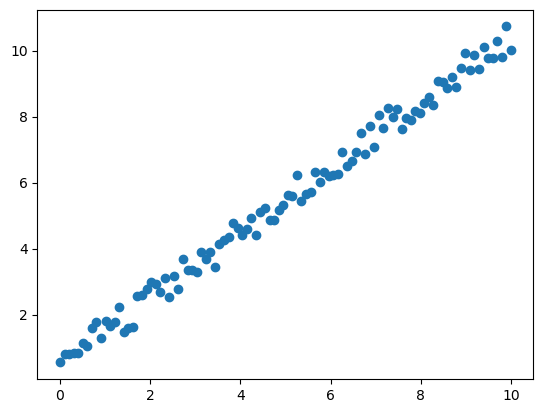

In [4]:
plt.scatter(X,Y)

4- Nuage de points par un model de regression lineaire

In [5]:
model = LinearRegression()

In [6]:
# a) entrainement du modele
model_train = model.fit(X,Y)

In [7]:
# b) evaluation du model
print('le score du modèle est de {}'.format(model.score(X,Y)))

le score du modèle est de 0.9904652159218895


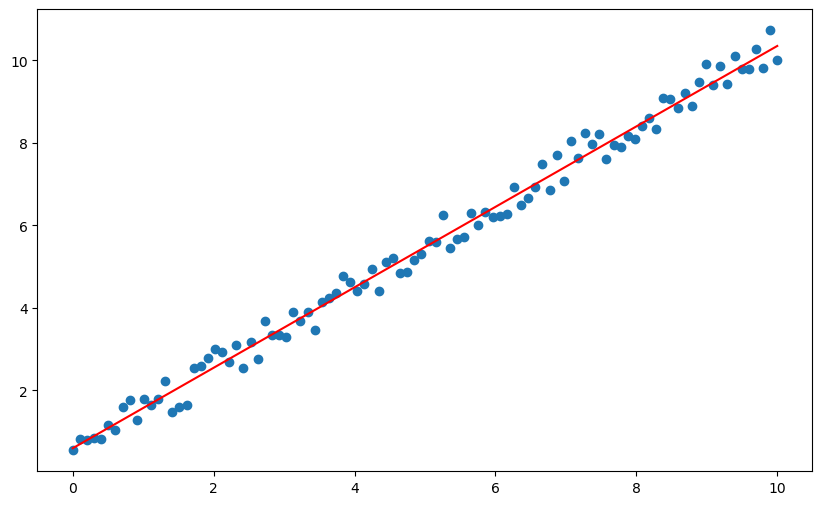

In [8]:
# c) superposition du nuage prédit
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
model_pred = model_train.predict(X)
plt.plot(X,model_pred, c='r')

In [9]:
#d) Commentaire : On obsere une observe une repartition linéaire de certaines données dans le nuage de point

In [10]:
#param du model : model.get

5-Nouveau  jeu d'échantillons 

In [11]:
X = np.linspace(0,10,m).reshape(m,1)
Y = X**2 + np.random.random_sample((m,1))

6-Nuage de points

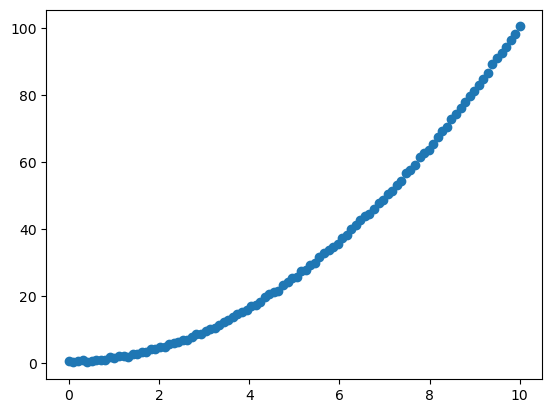

In [12]:
m=100
plt.scatter(X,Y)

7- regression linéaire de ce nuage de points

In [13]:
#a) caractéristique du modèle
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
#b) entrainement
model.fit(X,Y)

LinearRegression()

In [15]:
#c) evaluation du modèle
model_train.score(X,Y)

0.9362581577619835

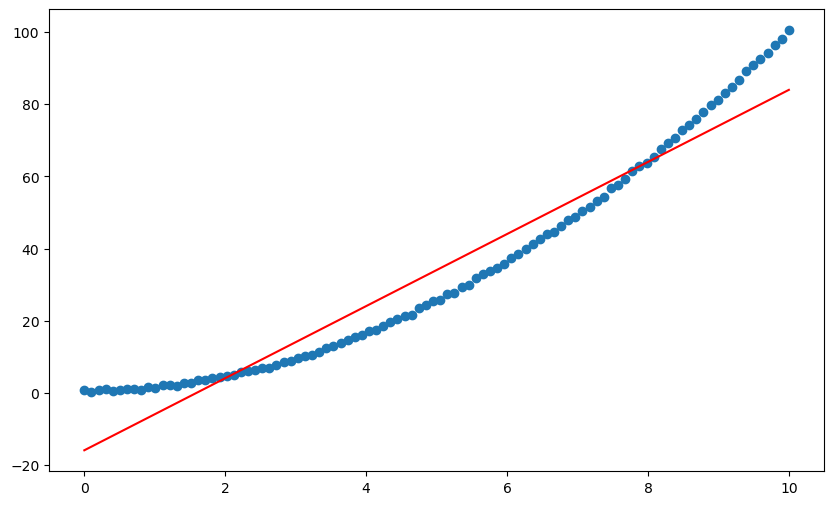

In [16]:
#d) superposition du nuage de points et modèle prédit pour m = 100
m=100
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,model.predict(X), c='r')

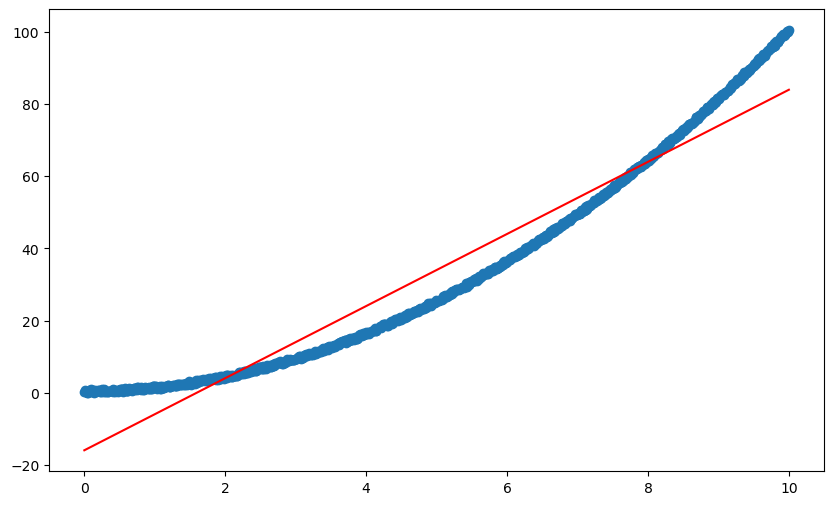

In [17]:
#superposition du nuage de points et modèle prédit pour m = 1000
m=1000
X = np.linspace(0,10,m).reshape(m,1)
Y = X**2 + np.random.random_sample((m,1))
#model.fit(X,Y) #entrainement
#model.score(X,Y)#evalaution
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,model.predict(X), c='r')

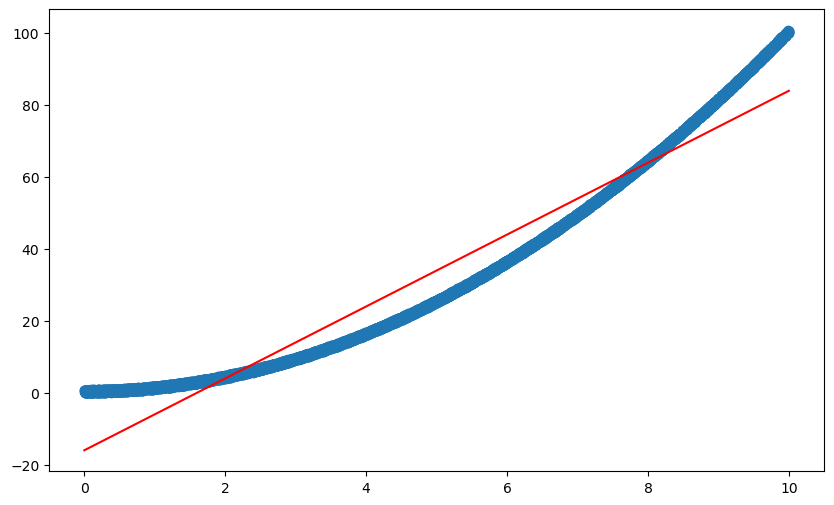

In [18]:
#superposition du nuage de points et modèle prédit pour m = 10000
m=10000
X = np.linspace(0,10,m).reshape(m,1)
Y = X**2 + np.random.random_sample((m,1))
#model.fit(X,Y) #entrainement
#model.score(X,Y)#evalaution
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,model.predict(X), c='r')

In [19]:
#e) Commentaire: 
#Malheureusement la courbe de predction ne suit pas le modèle caril est quadratique, peu importe la valeur de m

8- Modèle SVR

In [20]:
from sklearn.svm import SVR

model = SVR(C=100)

In [21]:
#a) caractéristiques du modèle
model.get_params()

{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
#b)entrainement
model.fit(X,Y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [23]:
#c)evaluation du model
print('le score de ce nouveau modèle est de {}'.format(model.score(X,Y)))

le score de ce nouveau modèle est de 0.9999059496337913


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


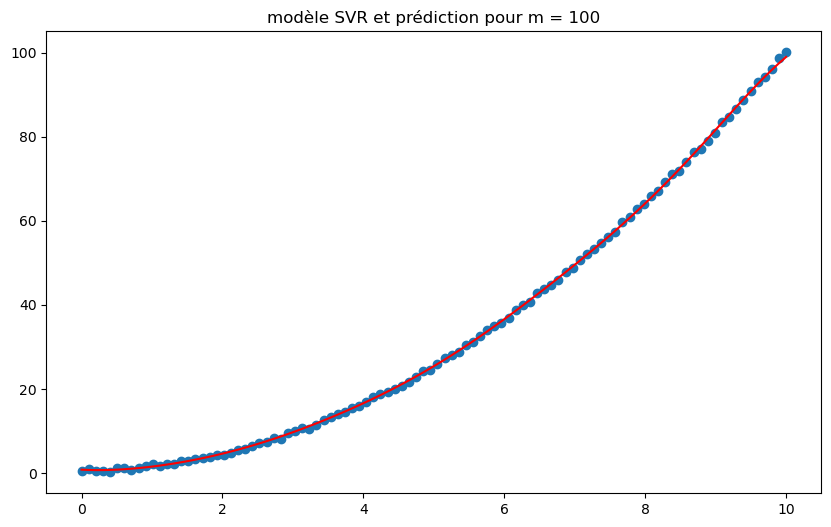

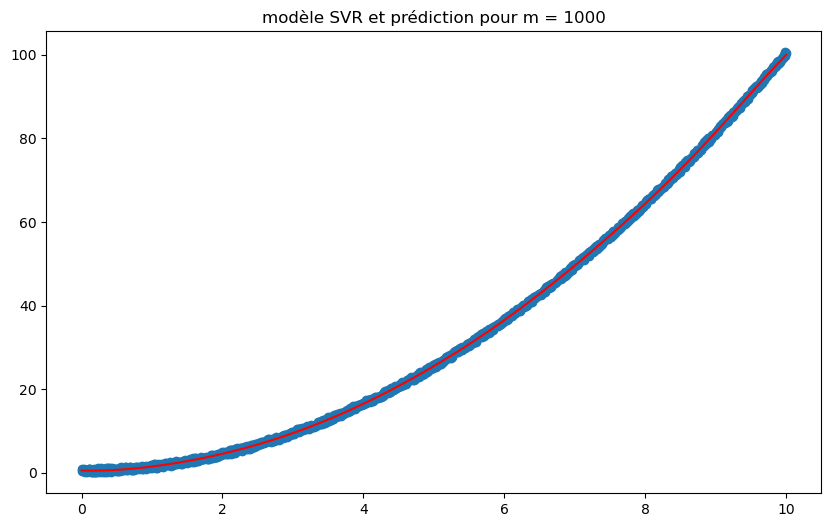

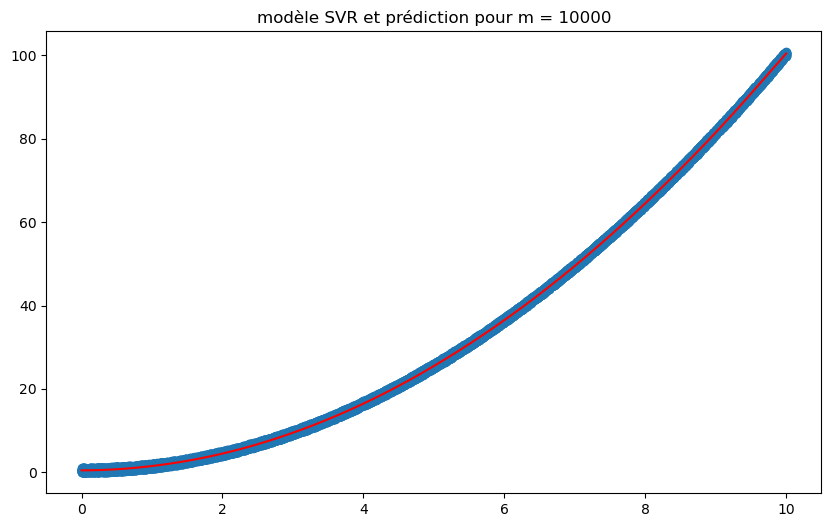

In [24]:
#f) modèle pour les différentes valeurs de m
import numpy as np 

for m in [100,1000,10000]:
    X = np.linspace(0,10,m).reshape(m,1)
    Y = X**2 + np.random.random_sample((m,1))
    model.fit(X,Y) #enrtrainemt
    
    plt.figure(figsize=(10,6))
    plt.scatter(X,Y)
    plt.plot(X, model.predict(X), c='r')
    plt.title('modèle SVR et prédiction pour m = {}'.format(m))

    

In [25]:
#d) Commentaire : la prédiction du modèle SVR suit le modèle de données quadratiques , peut importe la quantités des données et la valeur de m

Exercice  2 : CLASSIFICATION KNN

1-Importation des modules 

In [223]:
import pandas as pd
import seaborn as sns

2- Jeu de données du titanic

In [224]:
Titanic = sns.load_dataset('titanic')
Titanic.shape
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3- Analyse du jeu 

4-Nettoyage

In [225]:
#a) selection des colonnes désirées
Titanic = Titanic[['survived', 'pclass', 'sex', 'age']]
print(Titanic)

     survived  pclass     sex   age
0           0       3    male  22.0
1           1       1  female  38.0
2           1       3  female  26.0
3           1       1  female  35.0
4           0       3    male  35.0
..        ...     ...     ...   ...
886         0       2    male  27.0
887         1       1  female  19.0
888         0       3  female   NaN
889         1       1    male  26.0
890         0       3    male  32.0

[891 rows x 4 columns]


In [226]:
#b) suppression des données manquantes
Titanic.dropna(axis=0,inplace=True)
#print(Titanic)
Titanic.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [227]:
#c)Numérisation du sexe
#Titanic['sex'].replace(['male,female'],[0,1], inplace=False)
Titanic['sex'] = Titanic['sex'].replace({'male': 0, 'female': 1})
Titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [228]:
#d) Vérification de numérisation du jeu 
print('Le jeu est bien numérisé sur les features survived, pclass, sex, age' )

Le jeu est bien numérisé sur les features survived, pclass, sex, age


4- Modèle de classification

In [229]:
#a)Division X et Y 
Y = Titanic['survived'] #cible
X = Titanic.drop('survived',axis=1)#datframe sans survived à entrainer
print('X, datframe sans survived à entrainer')
print('Y cible à prédire')
print('')
print('Il est clair que le but ici sera d entrainer des données X pour prédire Y, en d autre terme , on veut prédire si un passager à survécu ou non')

X, datframe sans survived à entrainer
Y cible à prédire

Il est clair que le but ici sera d entrainer des données X pour prédire Y, en d autre terme , on veut prédire si un passager à survécu ou non


In [263]:
#b)Modèle de KneighboorsClassifier
from sklearn.neighbors import KNeighborsClassifier

model =KNeighborsClassifier(3)

In [264]:
#c) Entrainement du modèle
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [265]:
#d)Evaluation 
score=model.score(X,Y)
print(score)
print('')
#commentaire
print('Donc notre model est précis à {} %'.format((model.score(X,Y))*100))

0.8627450980392157

Donc notre model est précis à 86.27450980392157 %


5- Prédiction

In [266]:
#a) fonction survie & b) probabilité de survie
def survie(model, pclass,sex,age):
    x=np.array([pclass,sex,age]).reshape(1,3)
    
    prediction = model.predict(x)[0]
    
    print('prédiction : {}'.format(prediction))
    if prediction == 1 :
        print('Ce passager a survécu')
    else:
        print('Ce passager n a pas survécu')
        
    prob = model.predict_proba(x)[0]
    #print(prob)
    print('')
    print('la probabilité de ne pas survivre est de {}'.format(prob[0]))
    print('la probabilité de survivre est de {}'.format(prob[1]))

In [269]:
#a) test pour pclass = 3, sex=0, age = 26
test_survie = survie(model,pclass = 3, sex=0, age = 26)

prédiction : 0
Ce passager n a pas survécu

la probabilité de ne pas survivre est de 1.0
la probabilité de survivre est de 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


6- Variation du voisin de 1 à 10

In [270]:
# a) & b) vosin au meilleur score et prédiction de survie 
meilleur_voisin=0
valeur_score = []
for i in range (1,11):
    model =KNeighborsClassifier(i)
    model.fit(X,Y)
    val = model.score(X,Y)
    valeur_score.append(val)
    print('pour {} voisin(s) , on a un score de {}'.format(i,val))
    
meilleur_voisin = valeur_score.index(max(valeur_score))+1
print('')
print('pour {} voisin(s) , on a un score max de {}'.format(meilleur_voisin,max(valeur_score)))




pour 1 voisin(s) , on a un score de 0.8739495798319328
pour 2 voisin(s) , on a un score de 0.84593837535014
pour 3 voisin(s) , on a un score de 0.8627450980392157
pour 4 voisin(s) , on a un score de 0.8403361344537815
pour 5 voisin(s) , on a un score de 0.8417366946778712
pour 6 voisin(s) , on a un score de 0.8221288515406162
pour 7 voisin(s) , on a un score de 0.8207282913165266
pour 8 voisin(s) , on a un score de 0.7941176470588235
pour 9 voisin(s) , on a un score de 0.8095238095238095
pour 10 voisin(s) , on a un score de 0.8025210084033614

pour 1 voisin(s) , on a un score max de 0.8739495798319328


In [271]:
max(valeur)


0.8739495798319328

In [273]:
#b)prédiction de survie pour le score max 

#d'après ce qui précède, le nombre de voisin = 1 pour le score max
model =KNeighborsClassifier(1)
model.fit(X,Y)
model.score(X,Y)
print('en testant pour le passager pclass=3,sex=0,age=26 on a :')
test_survie = survie(model,pclass=3,sex=0,age=35)
 #la prédiction n'a pas changé pour l'homme !

en testant pour le passager pclass=3,sex=0,age=26 on a :
prédiction : 0
Ce passager n a pas survécu

la probabilité de ne pas survivre est de 1.0
la probabilité de survivre est de 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
